In [7]:
import math 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 

In [8]:
def H_function(alpha,beta,b,T,t):
     if T-t == 0:
        return 1
     else:
        return ((beta+alpha)/(beta+2*alpha)*2*math.exp((alpha+beta)**2*(T-t)/2)*norm.cdf(((alpha+beta)*(T-t)-b)/math.sqrt(T-t))+ \
     (2*alpha)/(beta+2*alpha)*math.exp(alpha**2*(T-t)/2+b*(beta+2*alpha))*norm.cdf(-(alpha*(T-t)+b)/math.sqrt(T-t)))

def vanilla_lookback(t,T, S, m, theta,sigma):

    b = (1/sigma)*np.log(m/S)

    V = np.exp(-(r+0.5*theta**2)*(T-t))*(m*H_function(theta, 0, 0, T,t)-m*H_function(theta,0,b,T,t)+S*H_function(theta, sigma,b,T,t))
    return V

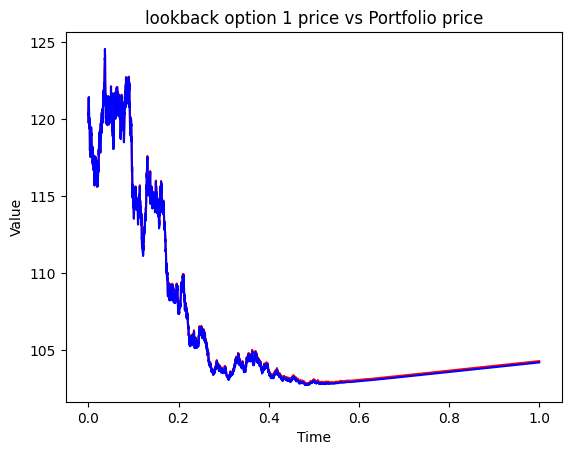

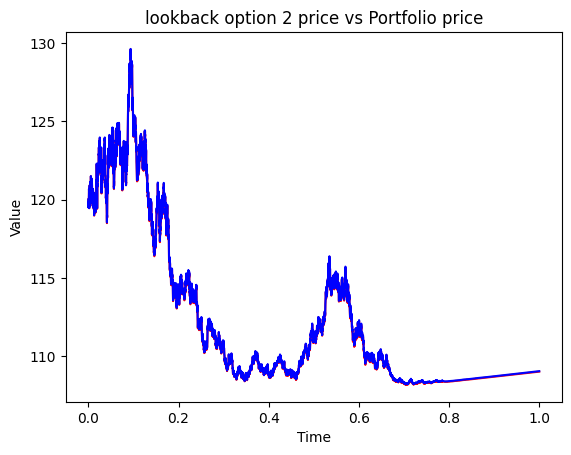

<Figure size 640x480 with 0 Axes>

In [9]:
S0 = 100
r = 0.03
sigma = 0.25
T = 1
dt = 0.0001
N = int(T/dt)
theta = (r-0.5*sigma**2)/sigma
e = 0.000001

for tt in range(2):
    t = np.r_[0:1.0001:.0001]
    tau = T-t
    dw = np.random.normal(0,np.sqrt(dt),N)
    W = np.concatenate(([0], np.cumsum(dw)))
    S = S0 * np.exp((r-0.5*sigma**2)*t+sigma*W)
    
    V0 = vanilla_lookback(t[0],T, S[0], S[0], theta,sigma)
    pi0 = V0
    Pi = [pi0]
    V = [V0]
    V_e_0 = vanilla_lookback(t[0],T, S[0]+e, S[0], theta,sigma)
    delta0 = (V_e_0 - V0)/e
    Delta = [delta0]
    y0 = pi0 - delta0*S[0]
    y = [y0]
    for i in range(N):
        #m = max(S[t] for t in range(i+2))
        m = max(S[0:i+1])
        pii = Delta[i]*S[i+1]+y[-1]*np.exp(r*dt)
        Pi.append(pii)
        
        if tau[i+1] > 0:
            V.append(vanilla_lookback(t[i+1],T, S[i+1], m, theta,sigma))
            delta = (vanilla_lookback(t[i+1],T, S[i+1]+e, m, theta,sigma)-vanilla_lookback(t[i+1],T, S[i+1], m, theta,sigma))/e
            yi = pii - delta*S[i+1]
        else : V.append(m)
        Delta.append(delta)
        y.append(yi)
                  
    plt.plot(t,V,color='red')
    plt.plot(t,Pi,color='blue')
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("lookback option "+str(tt+1)+" price vs Portfolio price")
    plt.figure()